# **DATA DESCRIPTION**

In [113]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [114]:
data = pd.read_csv("/kaggle/input/fraud-dataset-1/Fraud.csv")
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [115]:
data.shape

(6362620, 11)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [117]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# **1. DATA CLEANING**

**CHECKING FOR MISSING VALUES**

In [118]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


**OUTLIER DETECTION**

**Visualization of Original Data with Outliers:**

* The code generates a box plot of the transaction amount to visualize outliers.
* This helps in understanding the distribution of the data and identifying potential outliers.
* The box plot displays the median, quartiles, and any outliers present in the data.

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

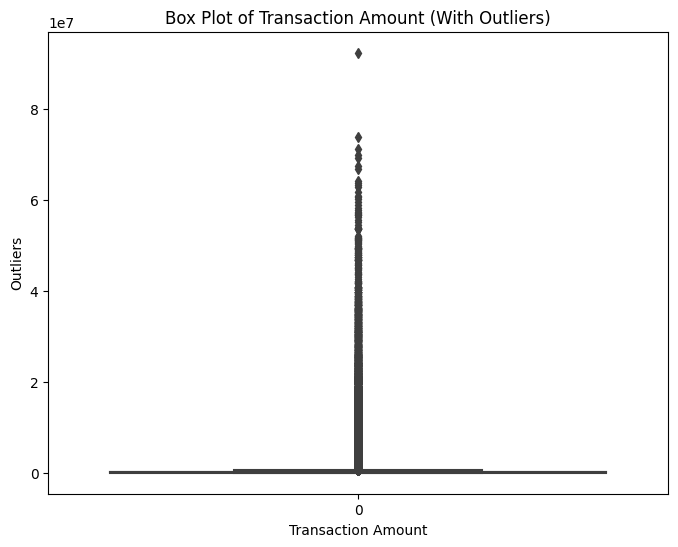

In [120]:
# Visualize the original data with outliers using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data["amount"])
plt.title("Box Plot of Transaction Amount (With Outliers)")
plt.xlabel("Transaction Amount")
plt.ylabel("Outliers")
plt.show()


**Filtering Outliers Using Z-score:**

* Calculates the Z-scores for the transaction amount, a measure of how many standard deviations an observation is from the mean.
* Defines a threshold (typically 3 standard deviations) to identify outliers.
* Filters out outliers based on the Z-score threshold.
* Creates a new dataset cleaned_data without outliers for further analysis.

In [121]:
# Filter out outliers using Z-score
z_scores = stats.zscore(data["amount"])
abs_z_scores = abs(z_scores)
outlier_threshold = 3
outlier_mask = (abs_z_scores < outlier_threshold)
cleaned_data = data[outlier_mask]

**Visualization of Cleaned Data without Outliers:**

* Similar to the first visualization, this code generates a box plot of the transaction amount.
* However, this time it displays the cleaned data without outliers.
* This allows for comparison with the original data to see the impact of outlier removal on the distribution of transaction amounts.

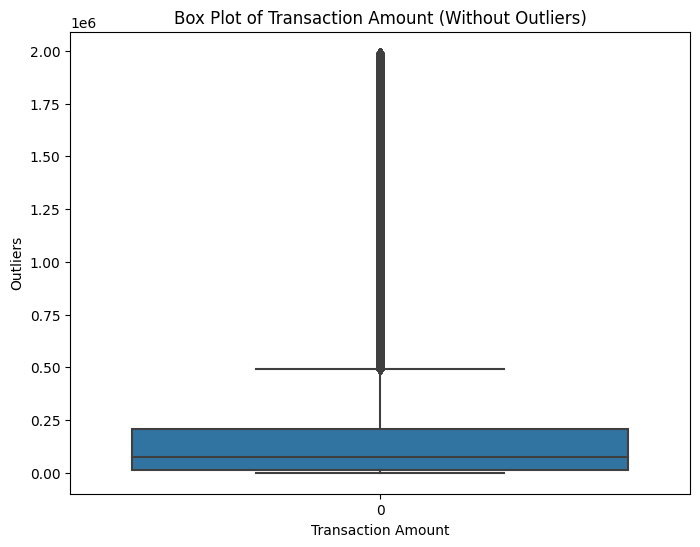

In [122]:
# Visualize the cleaned data without outliers using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(cleaned_data["amount"])
plt.title("Box Plot of Transaction Amount (Without Outliers)")
plt.xlabel("Transaction Amount")
plt.ylabel("Outliers")
plt.show()

**MULTICOLLINEARITY**

**Correlation Matrix Visualization:**

* Selects numeric columns and computes their correlation matrix.
* Displays the matrix as a heatmap, aiding in identifying correlations.
* This helps visualize relationships between variables.

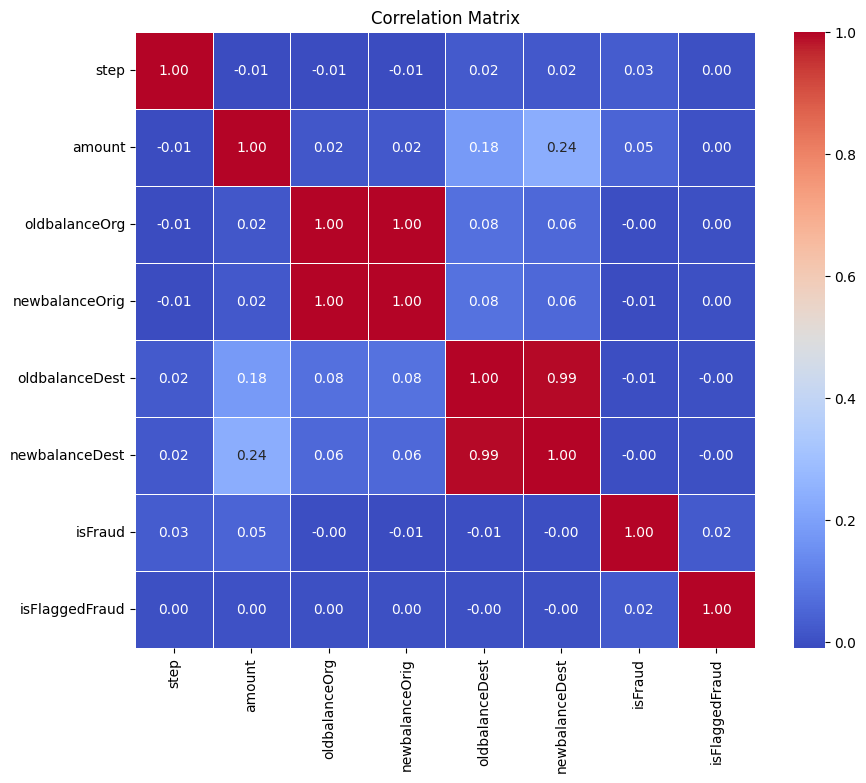

In [123]:
# Drop non-numeric columns if any
numeric_data = cleaned_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Highly Correlated Variable Identification:**

* Sets a threshold for identifying highly correlated variable pairs.
* Locates pairs with correlations exceeding the threshold.
* Prints out identified pairs for further examination.

In [124]:
# Find highly correlated variable pairs
high_corr_threshold = 0.8
high_corr_vars = np.where(np.abs(correlation_matrix) > high_corr_threshold)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_vars) if x != y]
unique_high_corr_pairs = set(frozenset(pair) for pair in high_corr_pairs)

# Print highly correlated variable pairs
print("Highly correlated variable pairs:")
for pair in unique_high_corr_pairs:
    print(pair)


Highly correlated variable pairs:
frozenset({'newbalanceOrig', 'oldbalanceOrg'})
frozenset({'newbalanceDest', 'oldbalanceDest'})


**Principal Component Analysis (PCA):**

* Standardizes data and performs PCA on selected columns.
* Plots explained variance ratio to determine component count.
* Adds PCA components to the dataset, reducing dimensionality while preserving significant variance.

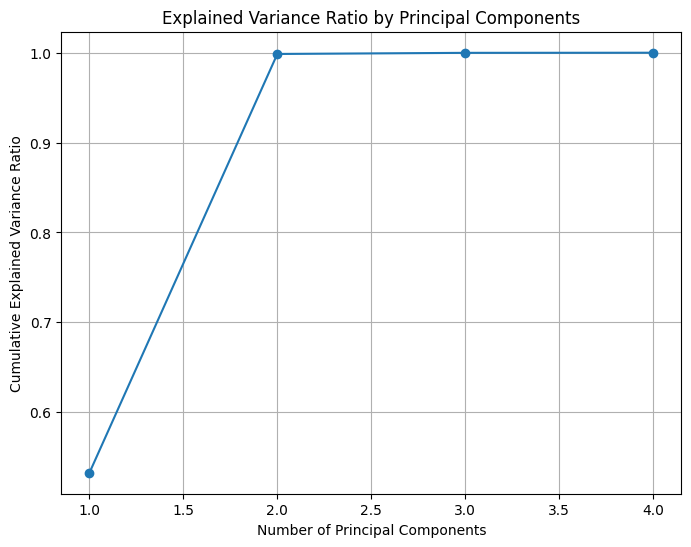

In [125]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns for PCA
columns_for_pca = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data[columns_for_pca])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Choose the number of components
explained_variance_ratio_threshold = 0.95
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= explained_variance_ratio_threshold) + 1

# Perform PCA with the chosen number of components
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(scaled_data)

# Add the PCA components to the dataset
for i in range(num_components):
    cleaned_data[f'PC{i+1}'] = pca_data[:, i]

# Drop the original columns used for PCA
cleaned_data.drop(columns=columns_for_pca, inplace=True)


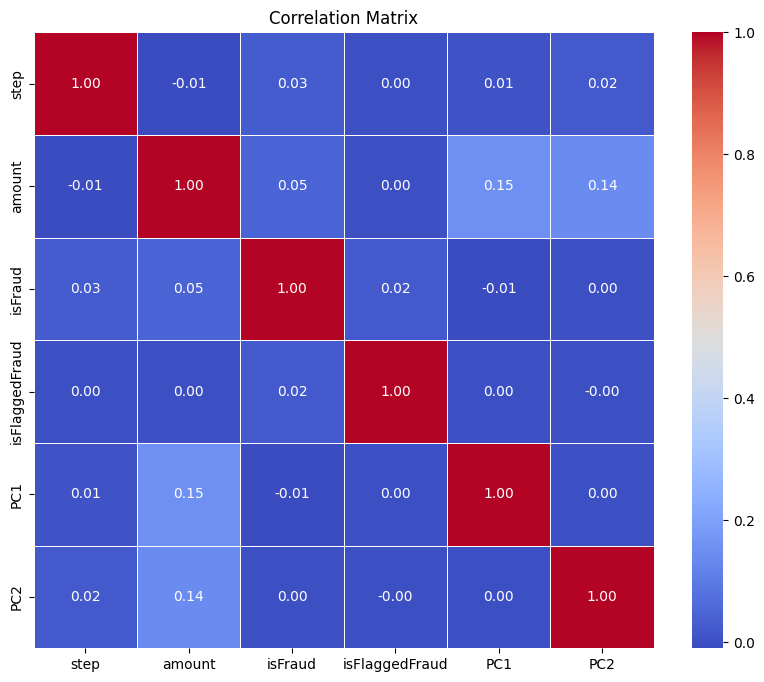

In [126]:
numeric_data = cleaned_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [127]:
cleaned_data.shape

(6317675, 9)

 # **2. FRAUD DETECTION MODEL**

*  The cleaned dataset is split into features (X) and the target variable (y).
*  Categorical variables are one-hot encoded to convert them into numerical form.
*  The dataset is split into training and testing sets using train_test_split() function.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [129]:
# Assuming 'isFraud' is the target variable
X = cleaned_data.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])  # Features
y = cleaned_data['isFraud']  # Target variable

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



**LOGISTIC REGRESSION**

* The model is initialized and trained using the LogisticRegression() class from scikit-learn.
* The logistic regression model is trained on the training data using fit() method.

In [130]:
# Initialize and train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

lr_accuracy=accuracy_score(y_test, y_pred_lr)
# Evaluation
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.998934734692747


* Predictions are made on the test set using the trained model with predict() method.
* Accuracy score is calculated by comparing the predicted labels with the actual labels using accuracy_score() function.
* The accuracy of the logistic regression model on the test set is approximately 99.89%.

**DECISION TREE CLASSIFIER**

* The Decision Tree model is initialized using the DecisionTreeClassifier() class with a specified maximum depth and random state.
* It's trained on the same training data used for the logistic regression model.

In [131]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

dt_accuracy=accuracy_score(y_test, y_pred_dt)
# Evaluation
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.9991887838484885


* Predictions are made on the test set using the trained decision tree model.
* Accuracy score is calculated by comparing the predicted labels with the actual labels.
* The accuracy of the decision tree model on the test set is approximately 99.92%.

# **3. SELECTION OF VARIABLES**

**TOP CORRELATED FEATURES**

In [132]:
# Calculate the correlation matrix
correlation_matrix = X_encoded.corr()

# Print out the column names of X_encoded to find the target variable
print("Column names in X_encoded:")
print(X_encoded.columns)

# Find the absolute correlation values with each feature
corr_with_target = correlation_matrix.abs().iloc[:-1, -1]  # Exclude the last row (target variable)

# Select top correlated features
top_correlated_features = corr_with_target.sort_values(ascending=False).head(5)  # Select top 5 features

# Print top correlated features
print("Top Correlated Features:")
print(top_correlated_features)


Column names in X_encoded:
Index(['step', 'amount', 'PC1', 'PC2', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
Top Correlated Features:
amount           0.557840
type_CASH_OUT    0.214387
type_PAYMENT     0.208107
type_CASH_IN     0.154464
PC2              0.148625
Name: type_TRANSFER, dtype: float64


**TOP FEATURES BASED ON DECICION TREE**

In [133]:
# Get feature importances
feature_importances_dt = dt_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_dt = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_dt})

# Sort features by importance
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

# Select top features based on importance
top_features_dt = feature_importance_df_dt.head(5)  # Select top 5 features (adjust as needed)

# Print top features for Decision Tree
print("Top Features for Decision Tree based on Importance:")
print(top_features_dt)


Top Features for Decision Tree based on Importance:
         Feature  Importance
3            PC2    0.378973
0           step    0.348159
1         amount    0.246027
2            PC1    0.019827
8  type_TRANSFER    0.007015


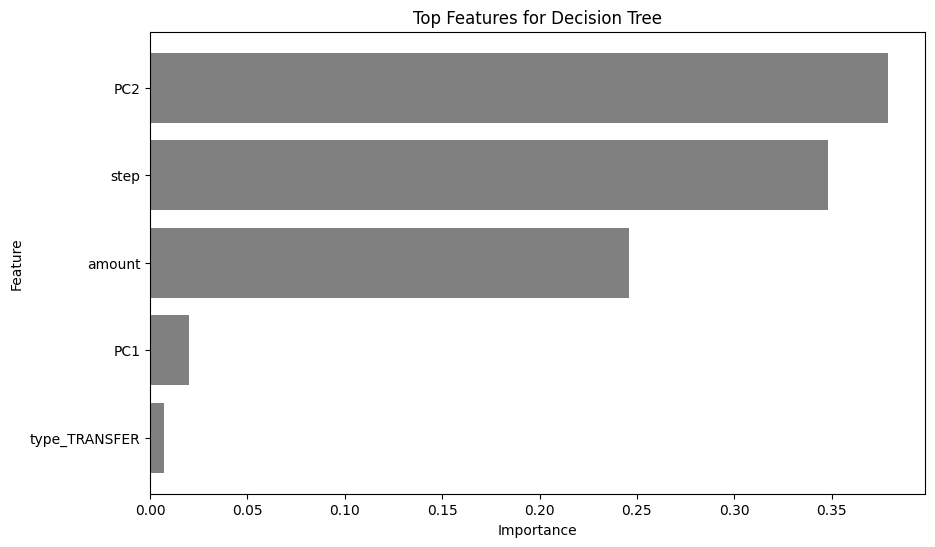

In [134]:
import matplotlib.pyplot as plt

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(top_features_dt['Feature'], top_features_dt['Importance'], color='grey')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features for Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


# **4. PERFORMANCE OF THE MODELS**

**LOGISTIC REGRESSION**

In [135]:
# Print the evaluation metrics
print("Logistic Regression Model Performance:")
print("Accuracy:",lr_accuracy)
print("Classification Report:")
lr_cr=classification_report(y_test, y_pred_lr)
print(lr_cr)

Logistic Regression Model Performance:
Accuracy: 0.998934734692747
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1262189
           1       0.00      0.00      0.00      1346

    accuracy                           1.00   1263535
   macro avg       0.50      0.50      0.50   1263535
weighted avg       1.00      1.00      1.00   1263535



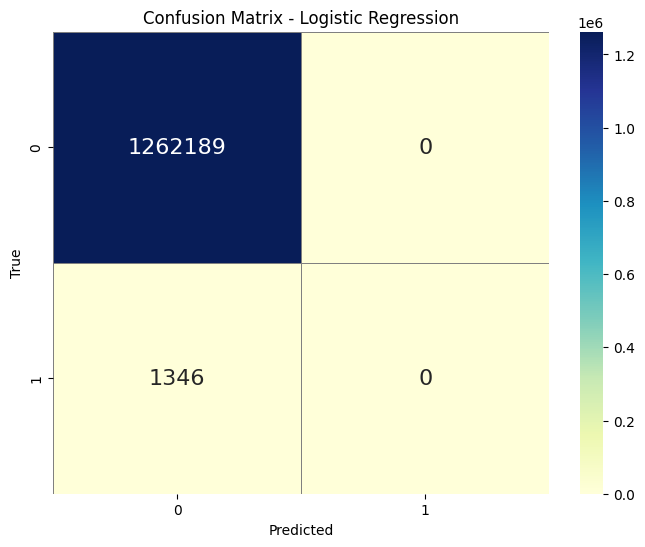

In [136]:
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"size": 16}, 
            linewidths=0.5, linecolor='gray')  # Setting border color to gray
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**RANDOM FOREST CLASSIFIER**


In [137]:
# Print the evaluation metrics
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
dt_cr=classification_report(y_test, y_pred_dt)
print(dt_cr)

Decision Tree Model Performance:
Accuracy: 0.9991887838484885
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1262189
           1       0.71      0.40      0.51      1346

    accuracy                           1.00   1263535
   macro avg       0.86      0.70      0.76   1263535
weighted avg       1.00      1.00      1.00   1263535



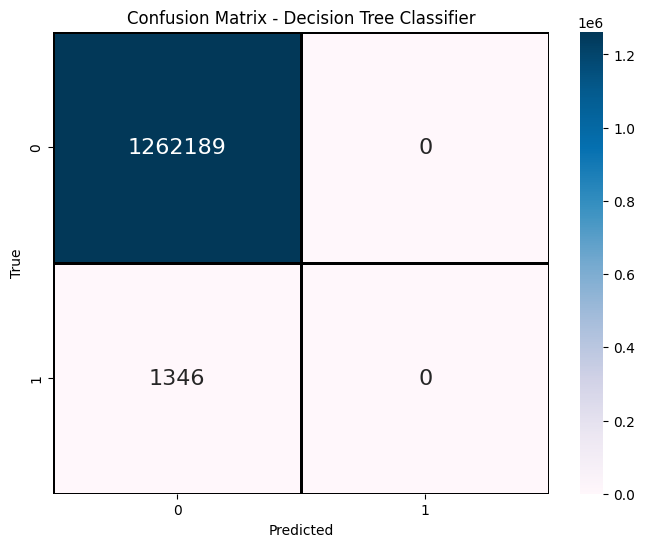

In [138]:
# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='PuBu', annot_kws={"size": 16}, 
            linewidths=1, linecolor='black')  # Setting border color to black and width to 1
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


# **5. FACTORS THAT PREDICT FRAUDULENT CUSTOMERS**

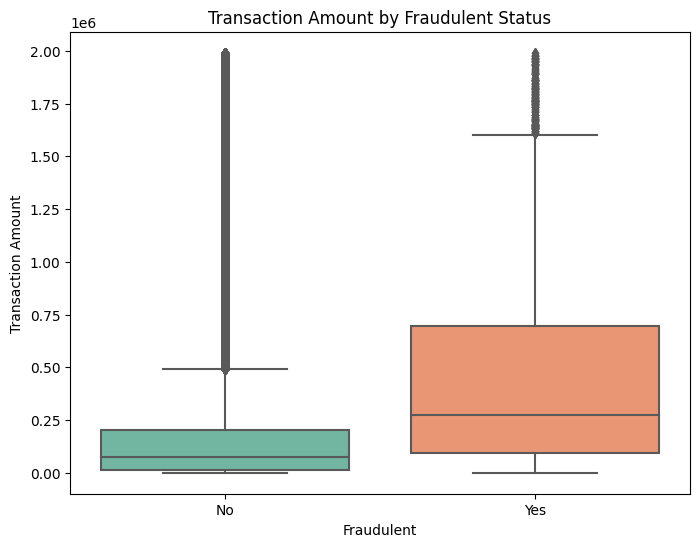

In [139]:
# Plot boxplot of transaction amount by fraudulent status
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x='isFraud', y='amount', palette='Set2')
plt.title('Transaction Amount by Fraudulent Status')
plt.xlabel('Fraudulent')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

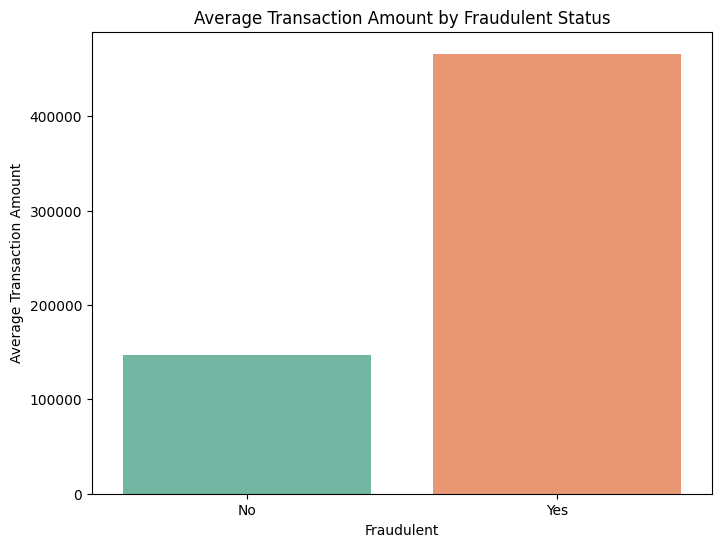

In [140]:
# Plot barplot of average transaction amount by fraudulent status
avg_transaction_amount = cleaned_data.groupby('isFraud')['amount'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_transaction_amount, x='isFraud', y='amount', palette='Set2')
plt.title('Average Transaction Amount by Fraudulent Status')
plt.xlabel('Fraudulent')
plt.ylabel('Average Transaction Amount')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

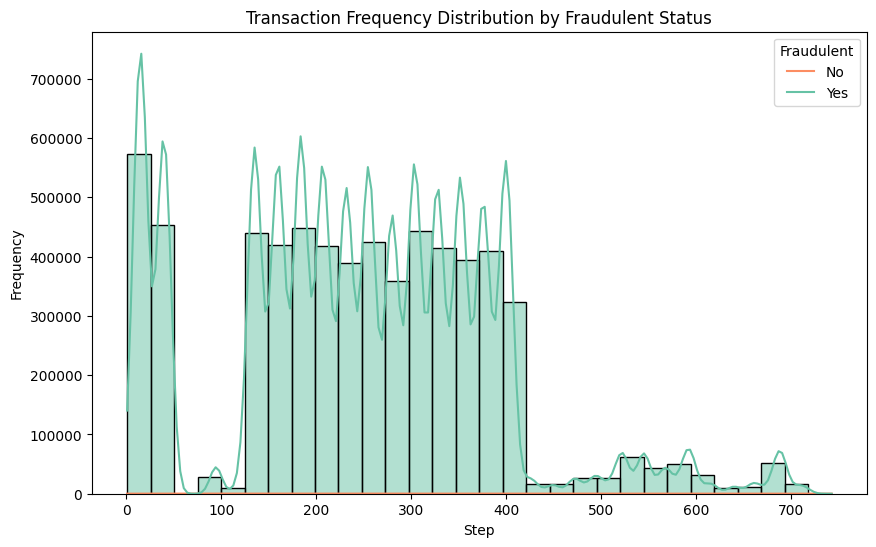

In [141]:
# Plot transaction frequency distribution for fraudulent vs. non-fraudulent customers
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='step', hue='isFraud', bins=30, kde=True, palette='Set2')
plt.title('Transaction Frequency Distribution by Fraudulent Status')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()

# **6. DO THESE FACTORS PREDICT FRAUDULENT CUSTOMER**

***Yes, the factors explored in the visualizations make sense for predicting fraudulent customers:***


*  **Transaction Amount Distribution :**
                Fraudulent transactions often involve unusual or large amounts compared to legitimate ones. Examining this distribution helps identify potential fraud patterns.
*   **Transaction Frequency Distribution :** 
               Fraudulent customers may exhibit irregular transaction patterns. Analyzing transaction frequency distributions can reveal anomalies indicative of fraud.
*   **Boxplot of Transaction Amount by Fraudulent Status :** 
               Significant differences in transaction amounts between fraudulent and non-fraudulent transactions highlight the importance of this factor in predicting fraud.
*   **Average Transaction Amount by Fraudulent Status :**
                Higher average transaction amounts for fraudulent transactions compared to non-fraudulent ones suggest transaction amount as a meaningful predictor of fraud.

**TRANSACTION AMOUNT DISTRIBUTION**

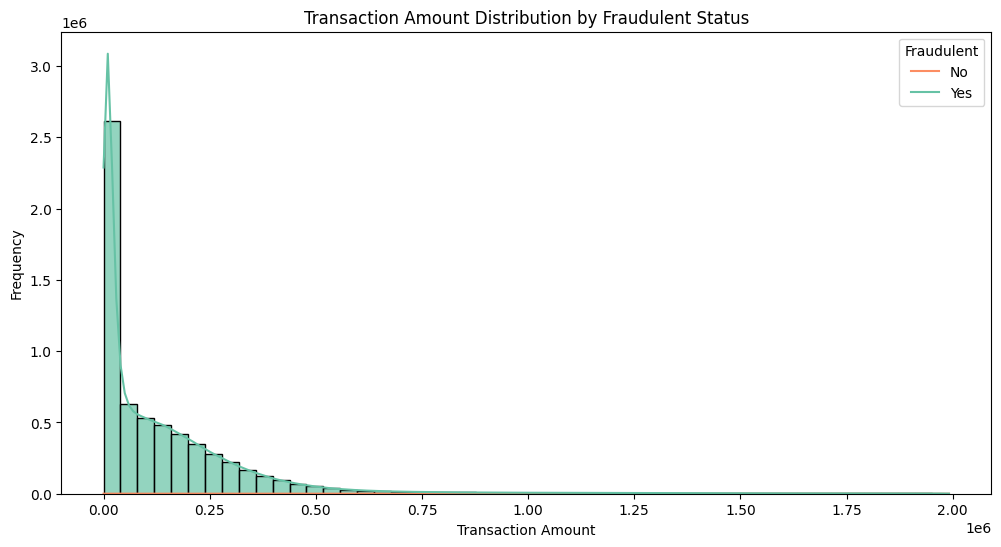

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot transaction amount distributions for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_data, x='amount', hue='isFraud', bins=50, kde=True, palette='Set2', alpha=0.7)
plt.title('Transaction Amount Distribution by Fraudulent Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()




**TRANSACTION FREQUENCY DISTRIBUTION**

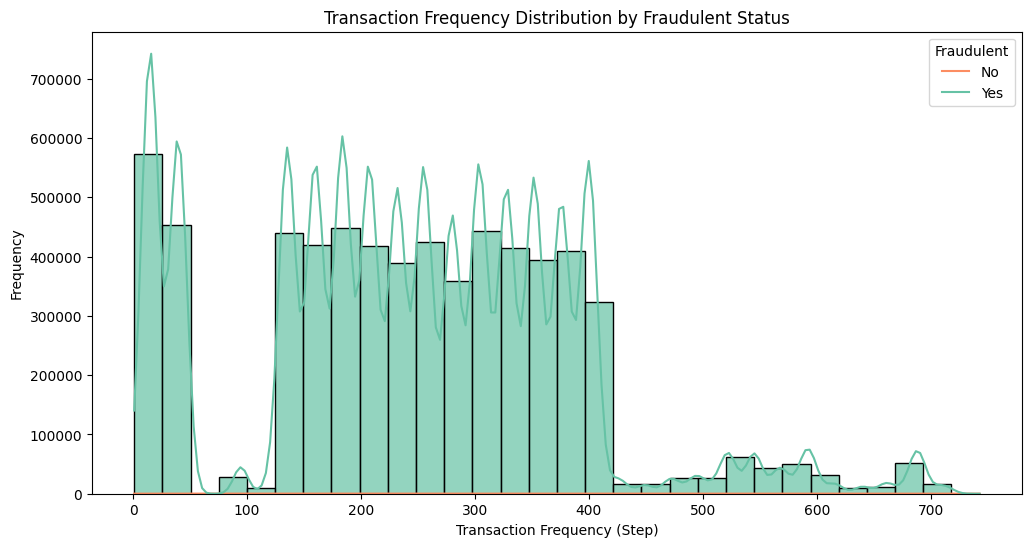

In [143]:
# Plot transaction frequency distributions for fraudulent vs. non-fraudulent customers
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_data, x='step', hue='isFraud', bins=30, kde=True, palette='Set2', alpha=0.7)
plt.title('Transaction Frequency Distribution by Fraudulent Status')
plt.xlabel('Transaction Frequency (Step)')
plt.ylabel('Frequency')
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()


> **Overall, the analysis provides valuable insights into fraud detection, highlighting the importance of transaction-related features and the effectiveness of preventive measures in mitigating fraudulent activities. The combination of data analysis, model building, and preventive measures offers a comprehensive approach to fraud detection and prevention in financial transactions.**